<a href="https://colab.research.google.com/github/StrizhAXE/DataAlgoritm/blob/main/Les_3_Algs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Измените функцию `calc_logloss` так, чтобы нули по возможности не попадали в `np.log` (как вариант - использовать `np.clip` или `np.where`).  
2. Подберите аргументы функции `eval_LR_model` для логистической регрессии таким образом, чтобы log loss был минимальным. Покажите влияние гиперпараметров на ошибку алгоритма (оптимально здесь использовать критерий остановки обучения).
3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса 1 (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, на выходе - массив `y_pred_proba`).
4. Создайте функцию `calc_pred`, возвращающую предсказанный класс (на вход подаются значения признаков `Х` и веса, которые уже посчитаны функцией `eval_LR_model`, на выходе - массив `y_pred`).
5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.
6. Могла ли модель переобучиться? Почему?
7. (\*) Создайте функции `eval_LR_model_l1` и `eval_LR_model_l2` с применением L1 и L2 регуляризации соответственно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # поступил или нет ученик на специальность Математика
# X

In [4]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [5]:
def standard_scaler(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[:, 2] = standard_scaler(X[:, 2])
# X_st[:, 2]

In [6]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [7]:
# Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - использовать np.clip или np.where)

In [8]:
def calc_logloss(y, y_pred):
    np.clip(y_pred, 0.01, 0.99, out = y_pred)
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [9]:
# Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным. 
# Покажите влияние гиперпараметров на ошибку алгоритма (оптимально здесь использовать критерий остановки обучения)

In [10]:
def eval_LR_model_mod(X, y, delta=1e-6, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    i = 0
    err = 10 * delta # начальное значение ошибки
    while True:
        z = np.dot(X, w) # log(p/(1-p))
        y_pred = sigmoid(z) # p [0, 1]
        err_old = err
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)))
        delta_err = abs(err - err_old)
        if delta_err < delta:
            # print(f"w = {w}, \nerr = {err}, \ni = {i}")
            break
        i += 1
    return w, err, i

In [11]:
w, error, num_iters = eval_LR_model_mod(X_st, y, 1e-10, 5)
print(f"w = {w}, \nerror = {error}, \ni = {num_iters}")

w = [-385.58493284  -51.03988018  -79.97863413  353.54733252], 
error = 0.015280765769949089, 
i = 48815


In [12]:
error_list = ['error', [], 'delta', []]
for delta in np.geomspace(1e-1, 1e-7, num=10):
    w, error, num_iters =  eval_LR_model_mod(X_st, y, delta, 5)
    # print(f"error = {error}, i = {num_iters}")
    error_list[1].extend([error])
    error_list[3].extend([delta])

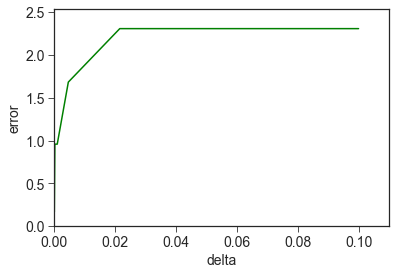

In [13]:
plt.xlabel('delta')
plt.ylabel('error')
plt.xlim( 0, max(error_list[3]) * 1.1 )
plt.ylim( 0, max(error_list[1]) * 1.1 )

plt.plot(error_list[3], error_list[1], color='g')

In [14]:
# 3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса 1 (на вход подаются значения признаков Х и веса, 
# которые уже посчитаны функцией `eval_LR_model`, на выходе - массив `y_pred_proba`)

In [15]:
def calc_pred_proba(X, w):
    X_st[:, 2] = standard_scaler(X[:, 2])
    y_pred = sigmoid(np.dot(X_st, w))
    return y_pred

In [16]:
y_pred_proba = calc_pred_proba(X, w).round(2)
y_pred_proba

array([0.19, 0.  , 1.  , 0.  , 1.  , 0.02, 1.  , 0.01, 0.81, 1.  ])

In [17]:
# 4. Создайте функцию `calc_pred`, возвращающую предсказанный класс (на вход подаются значения признаков `Х` и веса, 
# которые уже посчитаны функцией `eval_LR_model`, на выходе - массив `y_pred`)

In [18]:
def calc_pred(X, w, threshold = 0.5):
    X_st[:, 2] = standard_scaler(X[:, 2])
    y_pred = sigmoid(np.dot(X_st, w))
    for i in range(len(y_pred)):
        y_pred[i] = 1 if y_pred[i] > threshold else 0
    y_pred = np.array(list(map(int, y_pred)))
    return y_pred

In [19]:
y_pred = calc_pred(X, w, 0.9)
print(f"y_pred = {y_pred}\ny      = {y}") 

y_pred = [0 0 1 0 1 0 1 0 0 1]
y      = [0 0 1 0 1 0 1 0 1 1]


In [20]:
# 5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score

In [21]:
true_y_pred = 0
for i in range(len(y_pred)):
    true_y_pred += int(not(y_pred[i] ^ y[i]))
accuracy = true_y_pred / len(y_pred)
accuracy

0.9

In [22]:
TP = FP = TN = FN = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1 and y[i] == 1:
        TP += 1
    if y_pred[i] == 0 and y[i] == 0:
        FP += 1
    if y_pred[i] == 1 and y[i] == 0:
        TN += 1
    if y_pred[i] == 0 and y[i] == 1:
        FN += 1
print(f"TP = {np.round(TP, 2)}, FP = {np.round(FP, 2)}\nTN = {np.round(TN, 2)}, FP = {np.round(FP, 2)}")

TP = 4, FP = 5
TN = 0, FP = 5


In [23]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1_score = 2 * precision * recall / (precision + recall)
print(f"precision = {np.round(precision, 2)}\nrecall = {np.round(recall, 2)}\nF1_score = {np.round(F1_score, 2)}")

precision = 0.44
recall = 0.8
F1_score = 0.57


6. Могла ли модель переобучиться? Почему?

Да, модель может переобучиться т.к. в обучении участвует вся выборка. Веса признаков находятся примерно в одном масштабе, что говорит о не сильном переобучении. Опять же, чтобы это проверить, требуется больше данных.

In [24]:
w

array([-126.19099893,  -15.46048104,  -28.56198753,  112.19995289])